In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
import requests
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

import dataprep as dp
import visuals as viz

In [3]:
tj = "https://services9.arcgis.com/7Sr9Ek9c1QTKmbwr/arcgis/rest/services/Mesure_horaire_(30j)_Region_Occitanie_Polluants_Reglementaires_1/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
mensuelle = "https://services9.arcgis.com/7Sr9Ek9c1QTKmbwr/arcgis/rest/services/mesures_occitanie_mensuelle_poll_princ/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
response = requests.get(mensuelle)
m = response.json()

In [4]:
tj = "https://services9.arcgis.com/7Sr9Ek9c1QTKmbwr/arcgis/rest/services/Mesure_horaire_(30j)_Region_Occitanie_Polluants_Reglementaires_1/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
response = requests.get(tj)
j = response.json()

In [5]:
j.keys()

dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'geometryType', 'spatialReference', 'fields', 'exceededTransferLimit', 'features'])

In [6]:
noms=[]
for element in j["features"]:
    noms+=[element.get('attributes').get('nom_com')]
u_noms=np.unique(noms)
for u in u_noms:
    print(f"{u} {noms.count(u)}" )

AGDE 79
ALBI 4
ALES 12
ARGELES-GAZOST 3
AUCH 105
BELESTA-EN-LAURAGAIS 7
BEZIERS 52
BLAGNAC 9
CASTRES 27
CORNEILHAN 22
GAUDONVILLE 27
LA CALMETTE 23
LATTES 19
LOURDES 28
LUNEL-VIEL 6
MIRAMONT-DE-COMMINGES 5
MONTAUBAN 14
MONTGISCARD 11
MONTPELLIER 278
NIMES 16
PERPIGNAN 93
PEYRUSSE-VIEILLE 13
RODEZ 21
SAINT-GAUDENS 3
SAINT-GELY-DU-FESC 14
SAINT-GIRONS 3
SAZE 13
TARBES 18
TOULOUSE 75


In [7]:
j["features"][2]

{'attributes': {'nom_dept': 'TARN-ET-GARONNE',
  'nom_com': 'MONTAUBAN',
  'insee_com': 82121,
  'nom_station': 'Montauban - Ramierou Urbain',
  'code_station': 'FR50060',
  'typologie': 'Urbaine',
  'influence': 'Fond',
  'nom_poll': 'NOX',
  'id_poll_ue': 9,
  'valeur': 6.7,
  'unite': 'ug.m-3',
  'metrique': 'horaire',
  'date_debut': 1700913600000,
  'date_fin': 1700917200000,
  'statut_valid': 't',
  'x_l93': 569728,
  'y_l93': 6325102,
  'ObjectId': 3},
 'geometry': {'x': 1.3753099999999996, 'y': 44.01289999999996}}

In [8]:
j["features"][9]

{'attributes': {'nom_dept': 'PYRENEES-ORIENTALES',
  'nom_com': 'PERPIGNAN',
  'insee_com': 66136,
  'nom_station': 'Perpignan-Pyrenees Trafic',
  'code_station': 'FR50224',
  'typologie': 'Urbaine',
  'influence': 'Trafic',
  'nom_poll': 'NOX',
  'id_poll_ue': 9,
  'valeur': 58.5,
  'unite': 'ug.m-3',
  'metrique': 'horaire',
  'date_debut': 1699819200000,
  'date_fin': 1699822800000,
  'statut_valid': 't',
  'x_l93': 690848,
  'y_l93': 6177376,
  'ObjectId': 10},
 'geometry': {'x': 2.8884499999999997, 'y': 42.695899999999995}}

In [9]:
cities=[]
starts=[]
ends=[]
val=[]
poll_ue=[]
for element in j["features"]:
    cities+=[element.get('attributes').get('nom_com')]
    starts+=[element.get('attributes').get('date_debut')]
    ends+=[element.get('attributes').get('date_fin')]
    val+=[element.get('attributes').get('valeur')]
    poll_ue+=[element.get('attributes').get('id_poll_ue')]
cities_u=np.unique(cities)

df_data = pd.DataFrame()
df_data['city']=cities
df_data['start']=starts
df_data['end']=ends
df_data['values']=val
df_data['poll_ue']=poll_ue
    

In [10]:

df = pd.DataFrame(index=cities_u)


In [11]:
df_data['start'].apply(lambda x: dt.fromtimestamp(x/1e3))


0     2023-11-25 10:00:00
1     2023-11-25 12:00:00
2     2023-11-25 13:00:00
3     2023-11-25 14:00:00
4     2023-11-25 15:00:00
              ...        
995   2023-11-13 12:00:00
996   2023-11-15 11:00:00
997   2023-11-16 19:00:00
998   2023-11-19 07:00:00
999   2023-11-21 13:00:00
Name: start, Length: 1000, dtype: datetime64[ns]

In [12]:
dt.fromtimestamp(1699873200000/1e3)

datetime.datetime(2023, 11, 13, 12, 0)

In [71]:
df_m = dp.extract_data_to_df(data=m)
df_j = dp.extract_data_to_df(data=j)

In [75]:
df_j[df_j['city']=="MONTPELLIER"]

,city,start,end,values,poll_ue,nom_poll,influence,typology
134,MONTPELLIER,2023-11-14 04:00:00,2023-11-14 05:00:00,72.5,9,NOX,Trafic,Urbaine
135,MONTPELLIER,2023-11-14 08:00:00,2023-11-14 09:00:00,585.9,9,NOX,Trafic,Urbaine
136,MONTPELLIER,2023-11-14 11:00:00,2023-11-14 12:00:00,182.5,9,NOX,Trafic,Urbaine
137,MONTPELLIER,2023-11-14 12:00:00,2023-11-14 13:00:00,144.4,9,NOX,Trafic,Urbaine
138,MONTPELLIER,2023-11-14 13:00:00,2023-11-14 14:00:00,186.9,9,NOX,Trafic,Urbaine
...,...,...,...,...,...,...,...,...
924,MONTPELLIER,2023-11-02 04:00:00,2023-11-02 05:00:00,6.8,8,NO2,Trafic,Urbaine
952,MONTPELLIER,2023-11-02 05:00:00,2023-11-02 06:00:00,12.0,5,PM10,Fond,Urbaine
970,MONTPELLIER,2023-11-02 05:00:00,2023-11-02 06:00:00,10.9,5,PM10,Trafic,Urbaine
986,MONTPELLIER,2023-11-02 05:00:00,2023-11-02 06:00:00,13.8,9,NOX,Fond,Urbaine


In [86]:
df_j[(df_j['city']=='MONTPELLIER')&(df['nom_poll']=='NOX')].sort_values(by='start')
#df[(df['city']=='MONTPELLIER')&(df['nom_poll']=='NOX')].sort_values(by='start')

,city,start,end,values,poll_ue,nom_poll,influence,typology
924,MONTPELLIER,2023-11-02 04:00:00,2023-11-02 05:00:00,6.8,8,NO2,Trafic,Urbaine
987,MONTPELLIER,2023-11-02 05:00:00,2023-11-02 06:00:00,6.6,9,NOX,Fond,Urbaine
986,MONTPELLIER,2023-11-02 05:00:00,2023-11-02 06:00:00,13.8,9,NOX,Fond,Urbaine
134,MONTPELLIER,2023-11-14 04:00:00,2023-11-14 05:00:00,72.5,9,NOX,Trafic,Urbaine
135,MONTPELLIER,2023-11-14 08:00:00,2023-11-14 09:00:00,585.9,9,NOX,Trafic,Urbaine
137,MONTPELLIER,2023-11-14 12:00:00,2023-11-14 13:00:00,144.4,9,NOX,Trafic,Urbaine
139,MONTPELLIER,2023-11-14 14:00:00,2023-11-14 15:00:00,179.0,9,NOX,Trafic,Urbaine
140,MONTPELLIER,2023-11-14 15:00:00,2023-11-14 16:00:00,188.4,9,NOX,Trafic,Urbaine
141,MONTPELLIER,2023-11-14 16:00:00,2023-11-14 17:00:00,417.0,9,NOX,Trafic,Urbaine
369,MONTPELLIER,2023-11-15 06:00:00,2023-11-15 07:00:00,21.3,9,NOX,Trafic,Urbaine


In [34]:
df[(df['city']=='MONTPELLIER')&(df['nom_poll']=='PM2.5')].shape

(14, 8)

In [68]:
df[(df['city']=='MONTPELLIER')&(df['nom_poll']=='PM10')].sort_values(by='start')
df['start'].apply(lambda x: df.loc[df['start'] == x, 'values'].mean())

In [70]:
dp.get_unique_cities(df)

array(['TOULOUSE', 'BESSIERES', 'ALES', 'ALBI', 'TARBES',
       'PEYRUSSE-VIEILLE', 'AGDE', 'SAINT-GIRONS', 'LOURDES',
       'LUNEL-VIEL', 'RODEZ', 'BLAGNAC', 'MONTAUBAN', 'CASTRES',
       'MONTPELLIER', 'LATTES', 'NIMES', 'PERPIGNAN',
       'SAINT-GELY-DU-FESC', 'SAZE', 'BEZIERS', 'BELESTA-EN-LAURAGAIS',
       'MIRAMONT-DE-COMMINGES', 'MONTGISCARD', 'ARGELES-GAZOST', 'AUCH',
       'SAINT-ESTEVE', 'LA CALMETTE'], dtype=object)

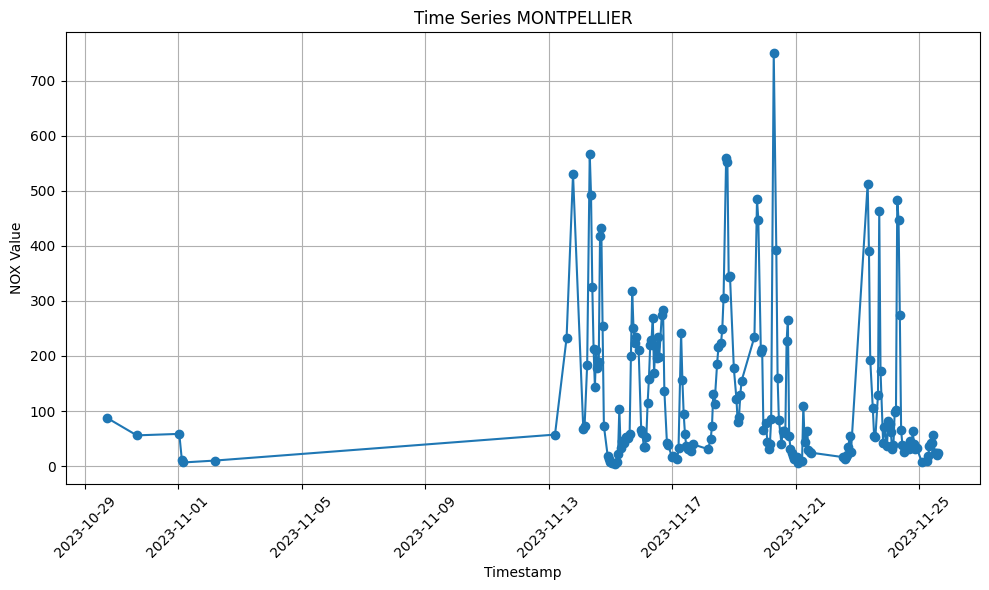

In [84]:
viz.visualize_df(df=df_j, city='MONTPELLIER', nom_poll="NOX")


In [ ]:
def average_duplicate_timestamps(dataframe, timestamp_column, value_column):



    # Group by timestamp and calculate the average value
    averaged_df = dataframe.groupby(timestamp_column)[value_column].mean().reset_index()

    return averaged_df